In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
gis_train = pd.read_csv("/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw3/data/Gisette/gisette_train.csv" )
gis_labels = pd.read_csv("/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw3/data/Gisette/gisette_train_labels.csv" )
gis_test = pd.read_csv("/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw3/data/Gisette/gisette_valid.csv" )
gis_test_labels = pd.read_csv("/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw3/data/Gisette/gisette_valid_labels.csv" )

In [3]:
dexter_train = pd.read_csv("/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw3/data/dexter/dexter_train.csv", header = None)
dexter_labels = pd.read_csv("/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw3/data/dexter/dexter_train_labels.csv", header = None)
dexter_test = pd.read_csv("/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw3/data/dexter/dexter_valid.csv", header = None)
dexter_test_labels = pd.read_csv("/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw3/data/dexter/dexter_valid_labels.csv", header = None)

In [4]:
file_loc = "/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw3/data/madelon"
mad_train = pd.read_fwf(file_loc + "/madelon_train.data", header = None)
mad_labels = pd.read_fwf(file_loc + "/madelon_train.labels", header = None)
mad_test = pd.read_fwf(file_loc + "/madelon_valid.data", header = None)
mad_test_labels = pd.read_fwf(file_loc + "/madelon_valid.labels", header = None)


/opt/miniconda3/envs/data_analysis/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


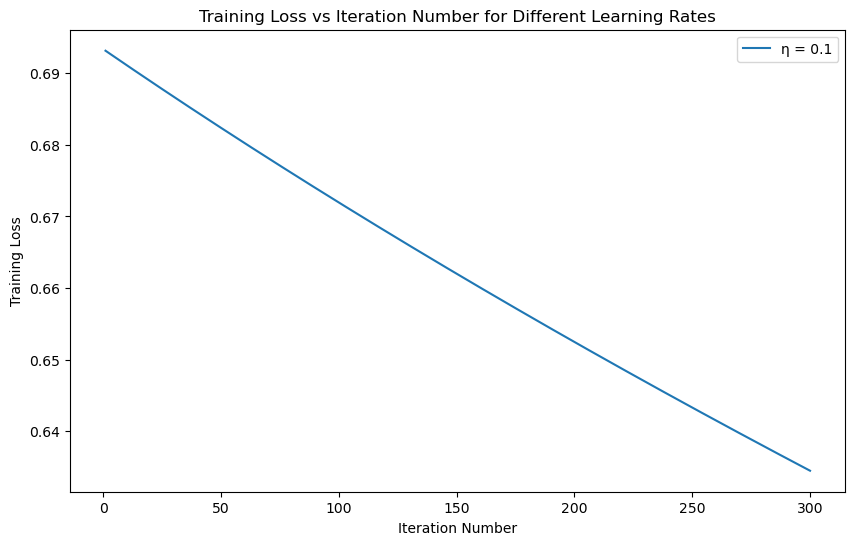

Training Misclassification Error: 0.6066666666666667
Test Misclassification Error: 0.608


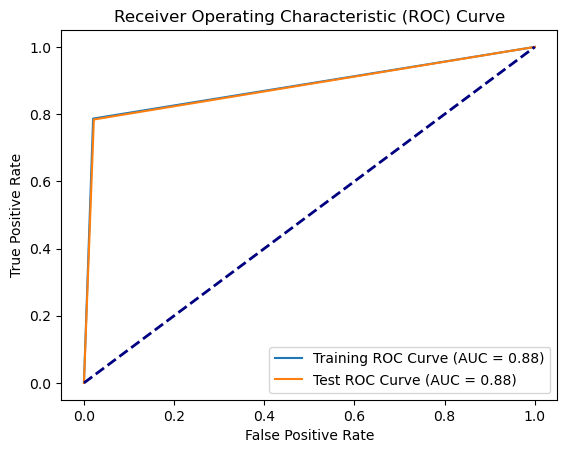

In [3]:
best_weights = None
best_loss = float('inf')

train = np.delete(gis_train, 5000, axis=1)
test = np.delete(gis_test, 5000, axis=1)

# Normalize variables
scaler = StandardScaler(with_mean = 0, with_std= 1)
train = scaler.fit_transform(train)
test = scaler.transform(test)

# Logistic Regression with Gradient Descent
max_iters = 300
lambda_param = 0.0001

# Initialize weights
weights = np.zeros((train.shape[1], 1))
final_weights = []
final_loss = []


# Create lists to store training loss and accuracy
training_loss_history = []

gis_labels_array = (gis_labels + 1) / 2


learning_rates = [.1]

for learning_rate in learning_rates:
    weights = np.zeros((train.shape[1], 1))  # Reset weights for each learning rate
    loss_history = []

    for iter in range(max_iters):
        predicted_labels = 1 / (1 + np.exp(-train @ weights))
  # Add small constant to avoid extreme values

        gradient = -(1 / len(train)) * (train.T @ (predicted_labels - gis_labels_array) + 2 * lambda_param * weights)
        weights = weights - learning_rate *lambda_param*weights + (learning_rate/len(train))*gradient
        epsilon = 1e-15  # Small constant to avoid zero or one values
        log_likelihood = -np.mean(
            gis_labels_array * np.log(predicted_labels + epsilon) +
            (1 - gis_labels_array) * np.log(1 - predicted_labels + epsilon)
        )
        loss = log_likelihood
        loss_history.append(loss)
    final_weights.append(weights)
    final_loss.append(loss)
        


    training_loss_history.append(loss_history)

best_loss_index = np.argmin(final_loss)
weights = final_weights[best_loss_index]


# Plot training loss vs iterations for different learning rates
plt.figure(figsize=(10, 6))
for i, learning_rate in enumerate(learning_rates):
    plt.plot(range(1, max_iters + 1), training_loss_history[i], label=f'η = {learning_rate}')
plt.xlabel("Iteration Number")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Iteration Number for Different Learning Rates")
plt.legend()
plt.show()

# Make predictions on training and test sets
train_labels_pred = (1 / (1 + np.exp(-train @ weights))) > 0.5
test_labels_pred = (1 / (1 + np.exp(-test @ weights))) > 0.5

# Calculate misclassification error
train_error = 1 - accuracy_score(gis_labels, train_labels_pred)
test_error = 1 - accuracy_score(gis_test_labels, test_labels_pred)

print(f"Training Misclassification Error: {train_error}")
print(f"Test Misclassification Error: {test_error}")

# Calculate ROC curve and AUC for training set
false_pos_rate_train, true_pos_rate_train, _ = roc_curve(gis_labels, train_labels_pred)
roc_auc_train = auc(false_pos_rate_train, true_pos_rate_train)

# Calculate ROC curve and AUC for test set
false_pos_rate_test, true_pos_rate_test, _ = roc_curve(gis_test_labels, test_labels_pred)
roc_auc_test = auc(false_pos_rate_test, true_pos_rate_test)

# Plot ROC curve
plt.figure()
plt.plot(false_pos_rate_train, true_pos_rate_train,
    label="Training ROC Curve (AUC = {:.2f})".format(roc_auc_train))
plt.plot(false_pos_rate_test, true_pos_rate_test,
    label="Test ROC Curve (AUC = {:.2f})".format(roc_auc_test))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [6]:
(1 / (1 + np.exp(-train @ weights)))

,Column1
0,0.497412
1,0.421507
2,0.492584
3,0.466022
4,0.515664
...,...
5995,0.472482
5996,0.525380
5997,0.453618
5998,0.488305


/opt/miniconda3/envs/data_analysis/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


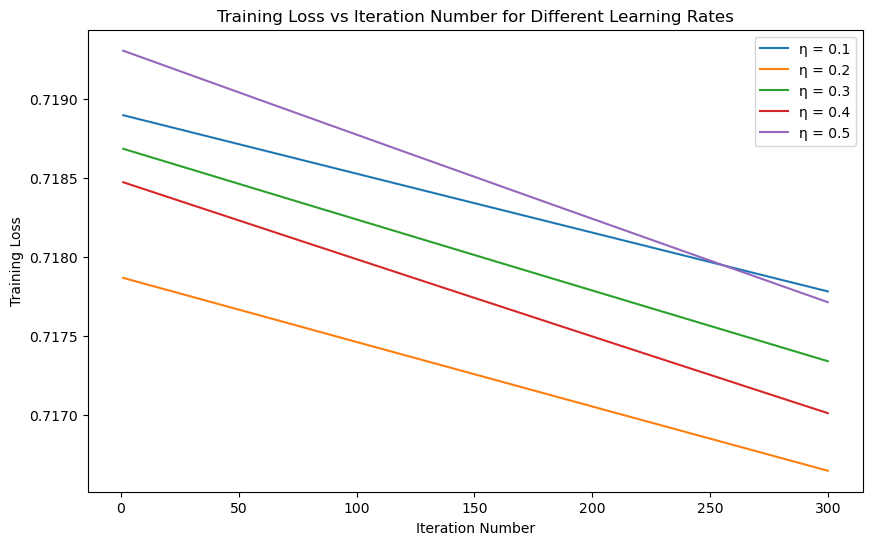

Training Misclassification Error: 0.5
Test Misclassification Error: 0.5


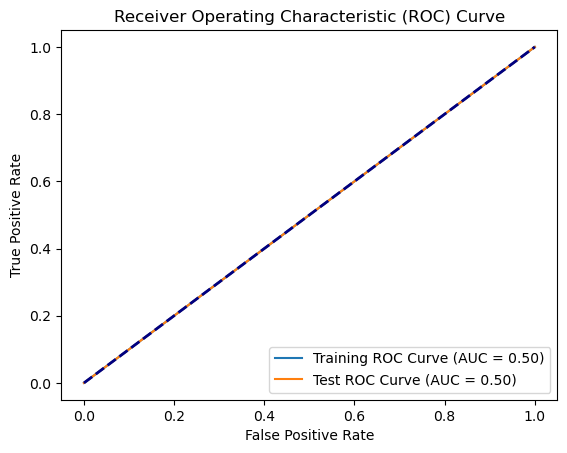

In [6]:
# Normalize variables
scaler = StandardScaler(with_mean= 0 , with_std= 1)
dexter_train_normalized = scaler.fit_transform(dexter_train)
dexter_test_normalized = scaler.transform(dexter_test)

# Logistic Regression with Gradient Descent
max_iters = 300
lambda_param = 0.0001

# Initialize weights
weights = np.zeros(dexter_train_normalized.shape[1])
final_weights = []
final_loss = []

# Create lists to store training loss and accuracy
training_loss_history = []
learning_rates = [.1,.2,.3,.4,.5]

dexter_labels_array = (dexter_labels + 1) / 2
for learning_rate in learning_rates:
    weights = np.random.rand(dexter_train_normalized.shape[1], 1) * 0.001  # Reset weights for each learning rate
    loss_history = []

    # Perform Gradient Descent
    for iter in range(max_iters):
        # Calculate predicted labels
        
        predicted_labels = 1 / (1 + np.exp(-dexter_train_normalized @ weights))
    
        # Calculate gradient
        
        gradient = -(1 / len(dexter_train_normalized)) * (dexter_train_normalized.T @ (predicted_labels - dexter_labels_array) + 2 * lambda_param * weights)
        
        epsilon = 1e-15
        # Update weights
        weights = weights - learning_rate * lambda_param *weights + lambda_param*gradient/(len(dexter_train_normalized))

        # Calculate training loss
        
        log_likelihood = -np.mean(dexter_labels_array * np.log(predicted_labels + epsilon) +
                                  (1 - dexter_labels_array) * np.log(1 - predicted_labels + epsilon))
        loss = log_likelihood
        loss_history.append(loss)

    final_weights.append(weights)
    final_loss.append(loss)
   
    # Store the loss history for plotting
    training_loss_history.append(loss_history)

best_loss_index = np.argmin(final_loss)
weights = final_weights[best_loss_index]

# Plot training loss vs iterations for different learning rates
plt.figure(figsize=(10, 6))
for i, learning_rate in enumerate(learning_rates):
    plt.plot(range(1, max_iters + 1), training_loss_history[i], label=f'η = {learning_rate}')

plt.xlabel("Iteration Number")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Iteration Number for Different Learning Rates")
plt.legend()
plt.show()

## Make predictions on training and test sets
train_labels_pred = (1 / (1 + np.exp(-dexter_train_normalized @ weights))) > 0.5
test_labels_pred = (1 / (1 + np.exp(-dexter_test_normalized @ weights))) > 0.5

# Convert DataFrame to NumPy array
dexter_labels_array = dexter_labels.values.flatten()
dexter_test_labels_array = dexter_test_labels.values.flatten()

# Calculate misclassification error
train_error = 1 - accuracy_score(dexter_labels_array, train_labels_pred)
test_error = 1 - accuracy_score(dexter_test_labels_array, test_labels_pred)

print(f"Training Misclassification Error: {train_error}")
print(f"Test Misclassification Error: {test_error}")

# Calculate ROC curve and AUC for training set
false_pos_rate_train, true_pos_rate_train, _ = roc_curve(dexter_labels_array, train_labels_pred)
roc_auc_train = auc(false_pos_rate_train, true_pos_rate_train)

# Calculate ROC curve and AUC for test set
false_pos_rate_test, true_pos_rate_test, _ = roc_curve(dexter_test_labels_array, test_labels_pred)
roc_auc_test = auc(false_pos_rate_test, true_pos_rate_test)

# Plot ROC curve
plt.figure()
plt.plot(false_pos_rate_train, true_pos_rate_train,
    label="Training ROC Curve (AUC = {:.2f})".format(roc_auc_train))
plt.plot(false_pos_rate_test, true_pos_rate_test,
    label="Test ROC Curve (AUC = {:.2f})".format(roc_auc_test))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


/opt/miniconda3/envs/data_analysis/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


every loop done


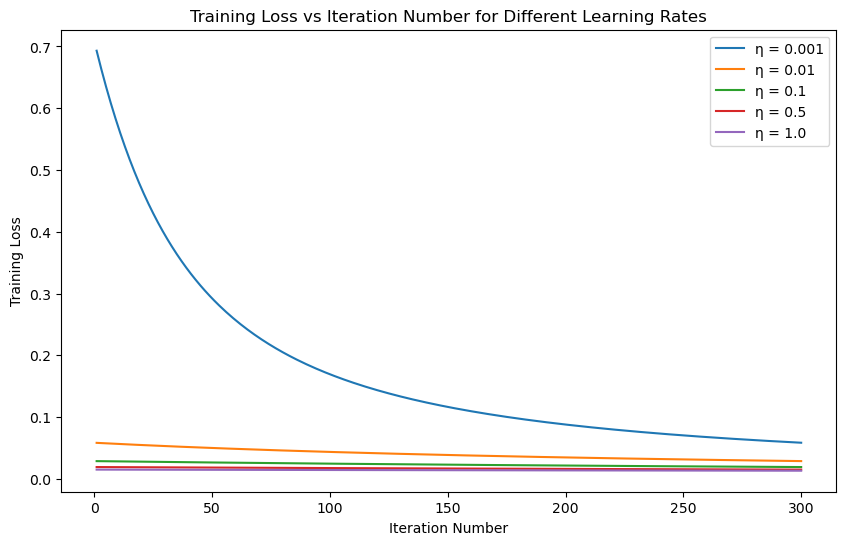

Training Misclassification Error: 1.0
Test Misclassification Error: 1.0


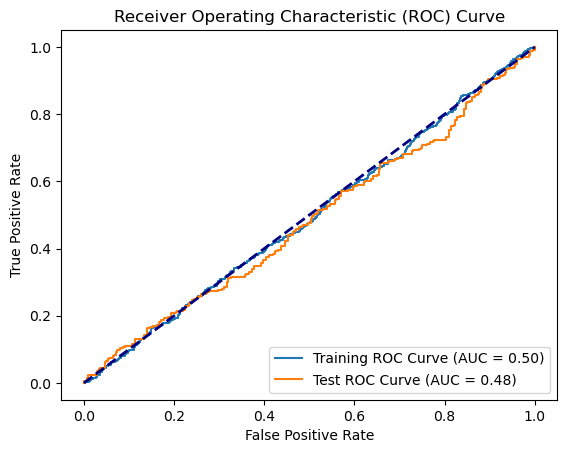

In [7]:
# Normalize variables
scaler = StandardScaler(with_mean= 0, with_std = 1)
mad_train_normalized = scaler.fit_transform(mad_train)
mad_test_normalized = scaler.transform(mad_test)

# Logistic Regression with Gradient Descent
max_iters = 300
lambda_param = 0.0001

# Initialize weights
weights = np.zeros((mad_train_normalized.shape[1],))
final_weights = []
final_loss = []

# Create lists to store training loss and accuracy
training_loss_history = []
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

mad_labels_array = mad_labels.squeeze().values

for learning_rate in learning_rates:
    loss_history = []

    # Perform Gradient Descent
    for iter in range(max_iters):
        # Calculate predicted labels
        predicted_labels = 1 / (1 + np.exp(-mad_train_normalized @ weights))

        # Calculate gradient
        gradient = -(1 / len(mad_train_normalized)) * (mad_train_normalized.T @ (predicted_labels - mad_labels_array) + 2 * lambda_param * weights)

        # Update weights
        weights = weights - learning_rate * lambda_param*weights + (lambda_param/len(mad_train_normalized))*gradient

        # Calculate training loss
        log_likelihood = -np.mean(mad_labels_array * np.log(predicted_labels + 1e-15) +
                                  (1 - mad_labels_array) * np.log(1 - predicted_labels + 1e-15))
        regularization_term = lambda_param * np.sum(weights**2, axis = 0)
        loss = log_likelihood + regularization_term
        loss_history.append(loss)
    final_weights.append(weights)
    final_loss.append(loss)

    # Store the loss history for plotting
    training_loss_history.append(loss_history)

print("every loop done")
best_loss_index = np.argmin(final_loss)
weights = final_weights[best_loss_index]

# Plot training loss vs iterations for different learning rates
plt.figure(figsize=(10, 6))
for i, learning_rate in enumerate(learning_rates):
    plt.plot(range(1, max_iters + 1), training_loss_history[i], label=f'η = {learning_rate}')

plt.xlabel("Iteration Number")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Iteration Number for Different Learning Rates")
plt.legend()
plt.show()

## Make predictions on training and test sets
train_labels_pred = (1 / (1 + np.exp(-mad_train_normalized @ weights))) > 0.5
test_labels_pred = (1 / (1 + np.exp(-mad_test_normalized @ weights))) > 0.5

# Convert DataFrame to NumPy array
mad_labels_array = mad_labels.values
mad_test_labels_array = mad_test_labels

# Calculate misclassification error
train_error = 1 - accuracy_score(mad_labels.squeeze(), train_labels_pred)
test_error = 1 - accuracy_score(mad_test_labels.squeeze(), test_labels_pred)


print(f"Training Misclassification Error: {train_error}")
print(f"Test Misclassification Error: {test_error}")

# Calculate ROC curve and AUC
false_pos_rate_train, true_pos_rate_train, _ = roc_curve(mad_labels,
          1 / (1 + np.exp(-mad_train_normalized @ weights)))

false_pos_rate_test, true_pos_rate_test, _ = roc_curve(mad_test_labels,
          1 / (1 + np.exp(-mad_test_normalized @ weights)))

roc_auc_train = auc(false_pos_rate_train, true_pos_rate_train)
roc_auc_test = auc(false_pos_rate_test, true_pos_rate_test)

# Plot ROC curve
plt.figure()
plt.plot(false_pos_rate_train, true_pos_rate_train,
    label="Training ROC Curve (AUC = {:.2f})".format(roc_auc_train))
plt.plot(false_pos_rate_test, true_pos_rate_test,
    label="Test ROC Curve (AUC = {:.2f})".format(roc_auc_test))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [8]:
predicted_labels


array([0.01316331, 0.01308705, 0.01306092, ..., 0.013067  , 0.01304348,
       0.0131077 ])

In [9]:
mad_train_normalized.T @ (predicted_labels - mad_labels_array) #+ 2 * lambda_param * weights)

array([[1970.53048207, 1959.08643523, 1955.16530168, ..., 1956.07698293,
        1952.54781654, 1962.18525181],
       [ 383.73601938,  381.29269367,  380.45552421, ...,  380.65016989,
         379.89668617,  381.95429689],
       [ 321.55126813,  319.55044551,  318.8648932 , ...,  319.0242872 ,
         318.40726456,  320.09222783],
       ...,
       [ 547.44387171,  543.88594709,  542.66687679, ...,  542.95031614,
         541.85310742,  544.84936116],
       [ 309.5758509 ,  307.70327162,  307.06166   , ...,  307.2108376 ,
         306.63336322,  308.21032824],
       [ 396.05862422,  393.65598796,  392.83276014, ...,  393.02416433,
         392.2832286 ,  394.3065733 ]])

(6000, 5001)
(6000, 5000)
(6000, 5000)
Training Misclassification Error: 0.0023333333333332984
Test Misclassification Error: 0.11699999999999999


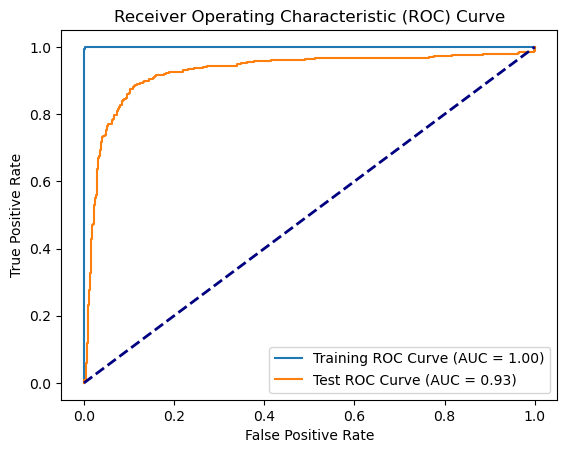

In [10]:
print(gis_train.shape)
gis_train = np.delete(gis_train, 5000, axis = 1)
print(gis_train.shape)
gis_test = np.delete(gis_test, 5000, axis =1)
lambda_param = 0.0001

# Add a column of ones to gis_train for the bias term
gis_train_augmented = np.c_[np.ones(gis_train.shape[0]), gis_train]
print(gis_train.shape)

# Calculate w
w = np.linalg.inv(gis_train_augmented.T @ gis_train_augmented + lambda_param * np.identity(gis_train_augmented.shape[1])) @ gis_train_augmented.T @ gis_labels.values

# Calculate w0
w0 = np.mean(gis_labels - gis_train_augmented @ w)

# Predictions on training set
predictions_train = np.sign(gis_train_augmented @ w + w0)
misclassification_error_train = 1 - accuracy_score(gis_labels, predictions_train)

# Predictions on test set
gis_test_augmented = np.c_[np.ones(gis_test.shape[0]), gis_test]
predictions_test = np.sign(gis_test_augmented @ w + w0)
misclassification_error_test = 1 - accuracy_score(gis_test_labels, predictions_test)

# ROC curve on training set
false_pos_rate_train, true_pos_rate_train, _ = roc_curve(gis_labels, gis_train_augmented @ w + w0)
roc_auc_train = auc(false_pos_rate_train, true_pos_rate_train)

# ROC curve on test set
false_pos_rate_test, true_pos_rate_test, _ = roc_curve(gis_test_labels, gis_test_augmented @ w + w0)
roc_auc_test = auc(false_pos_rate_test, true_pos_rate_test)

# Display the results
print(f"Training Misclassification Error: {misclassification_error_train}")
print(f"Test Misclassification Error: {misclassification_error_test}")

# Plot ROC curve
plt.figure()
plt.plot(false_pos_rate_train, true_pos_rate_train, label=f"Training ROC Curve (AUC = {roc_auc_train:.2f})")
plt.plot(false_pos_rate_test, true_pos_rate_test, label=f"Test ROC Curve (AUC = {roc_auc_test:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
